# Ejercicio


![](fig/dos_term_circ.png)


Se conocen los siguientes puntos de la curva de trasnferencia 

|$v_i[V]$|$i_o[mA]$|
|----:|----:|
|0.0  | 0.0 |
|0.05 | 6.035|
|0.222| 13.84|
|0.637|  1.896|


![](fig/dos_term_tras.png)


1.- Para máximo rendimiento obtener: $R$, $V_{pol}$, $V_o$ (Tensión pico sobre la carga) y $P_o$

2.- Potencia disipada por el diodo.

3.- Suponiendo que adoptamos una R de 100 Ohms y Qo=100 determinar el valor de los
elementos reactivos.

4.- Determinar : El valor pico de fundamental de la corriente del diodo (Id1)
Idem para la segunda armónica (Id2)
Idem para la tercera armónica (Id3)


In [122]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from scipy.fftpack import fft, fftfreq, ifft
from time import time



from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 12,
          'figure.figsize': (8, 8),
         'axes.labelsize': 12,
         'axes.titlesize': 12,
         'xtick.labelsize':12,
         'ytick.labelsize':12}
plt.rcParams.update(params) 



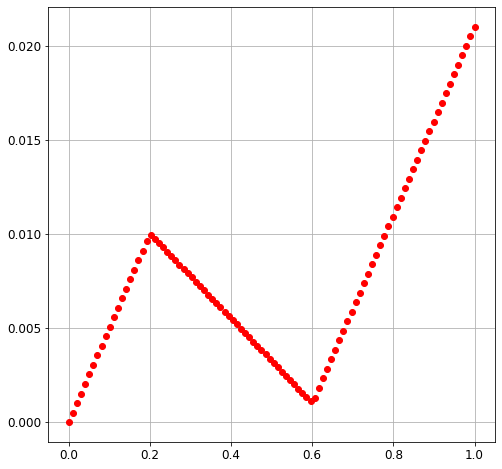

In [135]:
import warnings

x = np.array([0.0,  0.2, 0.6,  0.8])

y = np.array([0.0, 10e-3, 1e-3,  10e-3])

def IDT(v):
    i =  0.             if (v < 0.) else 0
    i = (10e-3/0.2)*(v) if (v >= 0  and v <= 0.2) else i
    i = 10e-3 - (9e-3/0.4)*(v-0.2) if (v > 0.2  and v <= 0.6) else i
    i = (10e-3/0.2)*(v-0.6)+1e-3 if (v > 0.6  ) else i
    return i

xp = np.linspace(0, 1, 100)
yp = [IDT(x) for x in xp]

vgsa = np.arange(-2.5,12,0.01)
plt.plot(xp,yp,'ro')

plt.grid()

plt.show()



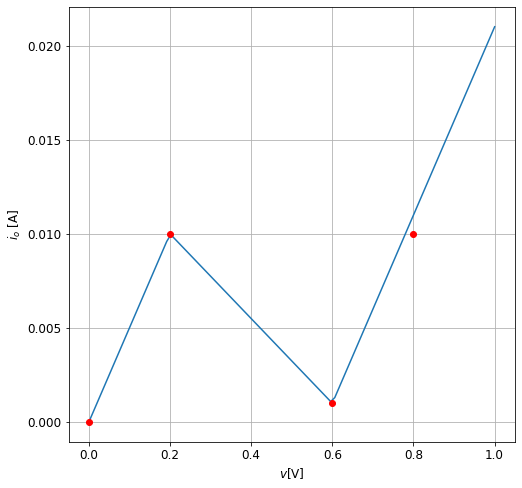

In [204]:
plt.plot(xp, yp)
plt.plot(x,y,'ro')

plt.ylabel('$i_{o}$ [A]')
plt.xlabel('$v$[V]')
plt.grid()
plt.savefig('fig/dos_term_tras.png')
plt.show()

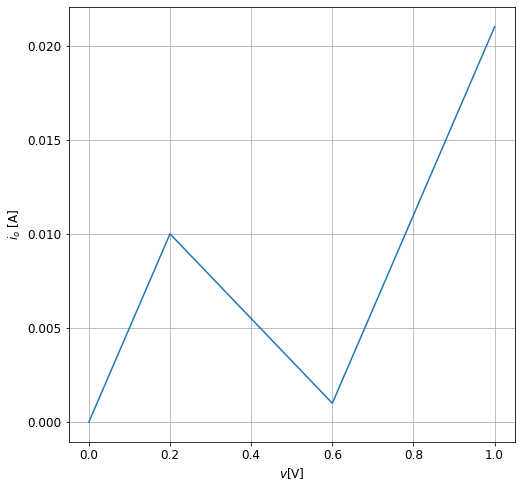

In [205]:
vp = np.linspace(0, 1, 5000)
idt = np.array([IDT(v) for v in vp])  
plt.plot(vp, idt )


plt.ylabel('$i_{o}$ [A]')
plt.xlabel('$v$[V]')
plt.grid()

plt.show()

In [206]:
g = np.diff(idt)/np.diff(vp)

print(len(g),len(vp))

4999 5000


0.5939187837567513


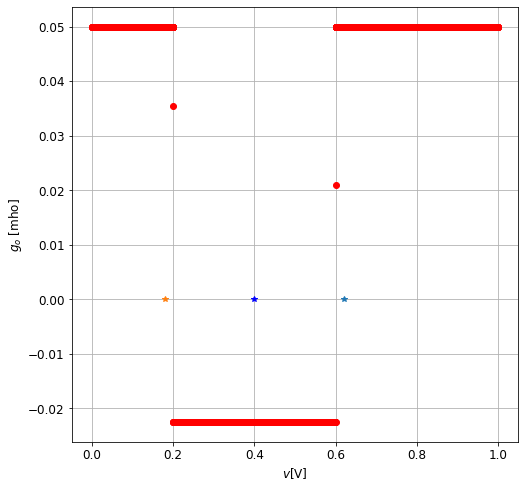

In [207]:


vpp = 0.4
#vs = ((0.24-0.07)/2)
vs = 0.22
plt.plot(vp[1:],g ,'ro')
print(vp[np.argmin(g)])


plt.plot(vpp,0,'b*')
plt.plot(vs+vpp,0,'*')
plt.plot(vpp-vs,0,'*')

plt.ylabel('$g_{o}$ [mho]')
plt.xlabel('$v$[V]')
plt.grid()

plt.show()


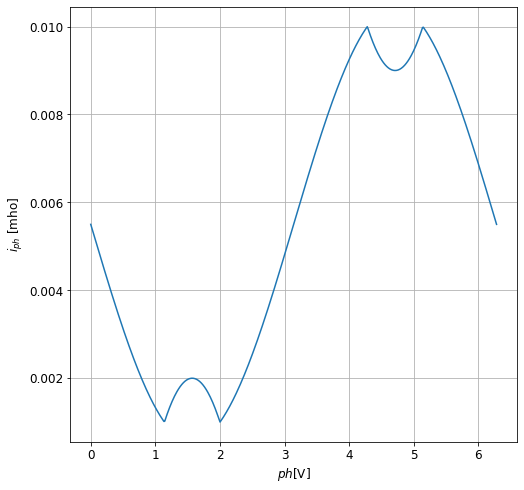

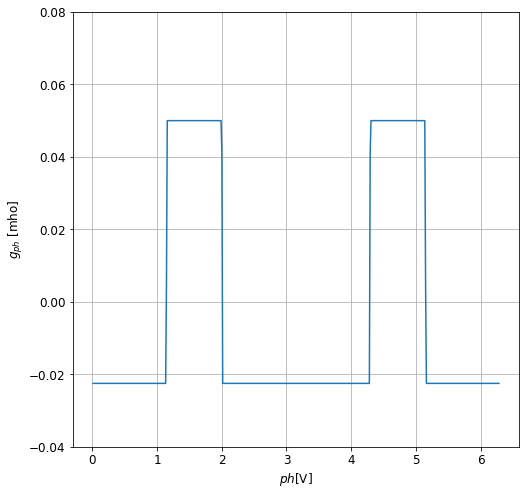

In [208]:
ph = np.pi*np.linspace(0,2, 500)

vd = vpp + vs*np.sin(ph)

idt = np.array([IDT(v) for v in vd])  

ge = np.diff(idt)/np.diff(vd)


plt.plot(ph,idt )

plt.ylabel('$i_{ph}$ [mho]')
plt.xlabel('$ph$[V]')
plt.grid()

plt.show()


plt.plot(ph[1:],ge )
plt.ylabel('$g_{ph}$ [mho]')
plt.xlabel('$ph$[V]')
plt.ylim([-0.04,0.08])
plt.grid()

plt.show()

In [209]:
geff = sum(ge)/len(ge)
print(geff)

-0.0026686122776770774


In [211]:
Qc = 100 
fo  = 1e9
wo = 2*np.pi*fo
r  = 600
rt = 1/(1/r+geff)

print(1/r,1/rt)
L =  -rt/Qc/wo
C = 1/(L*wo**2)

print('.param L = {:1.3e}'.format(L))
print('.param C = {:1.3e}'.format(C))
print('.param r = {:1.3e}'.format(r))

0.0016666666666666668 -0.0010019456110104106
.param L = 1.588e-09
.param C = 1.595e-11
.param r = 6.000e+02
